In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split   
from sklearn.ensemble import RandomForestClassifier 

In [2]:
train = pd.read_csv("Rasterio_Train.csv") 
train.drop(columns='Unnamed: 0', inplace=True)
# train.info()
train.head()

,id,crop,year,B10_01,B10_02,B10_03,B10_04,B10_05,B10_06,B10_07,...,B9_03,B9_04,B9_05,B9_06,B9_07,B9_08,B9_09,B9_10,B9_11,B9_12
0,059i1w,Palm,2024,1474.543637,1239.377163,1542.324491,1379.364860,1536.788158,1536.788158,1694.727413,...,5751.903883,3814.747020,4905.570934,4905.570934,5996.912341,4718.268743,4718.268743,4718.268743,3440.110342,3934.848904
1,0612VR,Palm,2024,1461.167243,1219.619377,1352.573626,1435.990773,1381.933872,1381.933872,1328.377932,...,4549.572472,4777.572088,4174.205306,4174.205306,3571.353326,3984.248750,3984.248750,3984.248750,4397.668205,3879.970012
2,09THeK,Rubber,2024,1380.200692,1380.877739,1353.495194,1366.900038,2222.544406,3078.720877,2756.417916,...,5036.193387,5309.564398,7850.173010,10391.249904,8245.413303,6278.562476,6278.562476,6278.562476,4312.176471,3839.525567
3,0B09t7,Palm,2024,1499.773420,1265.531590,1434.555556,1319.816993,1337.917211,2336.705882,1953.703704,...,4843.775599,4864.993464,4947.705156,8131.467683,6896.697894,7508.212055,4403.307916,5220.618736,6600.681917,3441.351489
4,0DNGt7,Cocoa,2024,1839.022684,1551.366013,1394.325644,1483.047674,1687.677432,1687.677432,1892.833910,...,4113.998462,5342.800846,5907.020377,5907.020377,6471.748558,6132.783160,6132.783160,5794.317955,6197.805844,4206.654748


In [3]:
test = pd.read_csv("Raster_Test.csv")
test.drop(columns='Unnamed: 0', inplace=True)
identifier = test['id']
# crops = test['crop']
test.head()

,id,crop,year,B10_01,B10_02,B10_03,B10_04,B10_05,B10_06,B10_07,...,B9_03,B9_04,B9_05,B9_06,B9_07,B9_08,B9_09,B9_10,B9_11,B9_12
0,167,Unknown,2024,1413.550173,1331.888889,1412.000769,1397.169166,1644.213379,1644.213379,1891.722030,...,5271.803153,5407.549020,5460.485967,5460.485967,5513.909650,5239.878893,5239.878893,5239.878893,4966.336794,4038.545944
1,4157,Unknown,2024,1415.679354,2062.143791,1200.608997,3750.434448,2787.703960,2787.703960,1825.451365,...,2991.379085,9516.668205,8025.386005,8025.386005,6534.613226,6878.963476,7868.880046,7299.960400,4562.962707,3770.745483
2,10554,Unknown,2024,1438.800461,1449.426759,1377.769319,1327.434833,1414.018454,1424.198001,1434.895040,...,5078.041138,4832.236832,5645.222222,5443.637063,5242.556324,4980.081892,4980.081892,4980.081892,4718.110727,4150.348328
3,16218,Unknown,2024,1473.059592,1330.211842,1381.695502,2598.375240,2522.008458,2522.008458,2446.113802,...,4819.727413,5576.604767,6620.697809,6620.697809,7665.306421,7543.424068,7543.424068,7543.424068,7422.029988,3824.442907
4,18928,Unknown,2024,1847.900423,1471.527489,1556.661669,1460.910419,1486.103037,1486.103037,1511.718185,...,5459.262976,5112.559016,5165.049212,5165.049212,5218.056132,5193.440600,5193.440600,5169.303729,3830.091119,4330.861592


In [4]:
# Identify all band columns (excluding 'id', 'crop', etc.)
band_columns = [col for col in train.columns if col.startswith('B')]

# Normalize by 0.0001 
train[band_columns] = train[band_columns] * 0.0001


In [5]:
import numpy as np 

L = 0.5  
eps = 1e-10  

index = train.index  # retain index for final DataFrame
new_features = {}

for m in range(1, 13):
    s = f"{m:02d}"
    B2, B3, B4, B5, B8, B11 = train[f"B2_{s}"], train[f"B3_{s}"], train[f"B4_{s}"], train[f"B5_{s}"], train[f"B8_{s}"], train[f"B11_{s}"]

    new_features.update({
        f"NDVI_{s}": (B8 - B4) / (B8 + B4 + eps),
        f"EVI_{s}": 2.5 * (B8 - B4) / (B8 + 6 * B4 - 7.5 * B2 + 1 + eps),
        f"RVI_{s}": B8 / (B4 + eps),
        f"SAVI_{s}": ((1 + L) * (B8 - B4)) / (B8 + B4 + L + eps),
        f"NDWI_{s}": (B3 - B8) / (B3 + B8 + eps),
        f"MSAVI_{s}": 0.5 * (2 * B8 + 1 - np.sqrt((2 * B8 + 1)**2 - 8 * (B8 - B4))),
        f"NDRE_{s}": (B8 - B5) / (B8 + B5 + eps),
        f"GCI_{s}": (B8 / (B3 + eps)) - 1,
        f"TCI_{s}": 0.5 * ((665 - 490) * (B2 + B4 - 2 * B3)),
        f"PSRI_{s}": (B4 - B2) / (B8 + eps),
        f"NDMI_{s}": (B8 - B11) / (B8 + B11 + eps),
        f"CIRE_{s}": (B8 / (B5 + eps)) - 1, 
        f"EVI2_{s}": 2.5 * (B8 - B4) / (B8 + 2.4 * B4 + 1 + eps),
        f"GNDVI_{s}": (B8 - B3) / (B8 + B3 + eps),
        f"NGRDI_{s}": (B8 - B5) / (B8 + B5 + eps),
        f"NBR_{s}": (B8 - B11) / (B8 + B11 + eps),
        f"NDBI_{s}": (B11 - B8) / (B11 + B8 + eps),
        f"SRWI_{s}": B8 / (B11 + eps),
        f"CCCI_{s}": ((B8 - B5) / (B8 + B5 + eps)) / ((B8 - B4) / (B8 + B4 + eps))
    })

# Calculate temporal features
for feature in ['NDVI', 'EVI', 'SAVI', 'MSAVI', 'NDRE']:
    values = np.array([new_features[f"{feature}_{m:02d}"] for m in range(1, 13)])
    new_features.update({
        f"{feature}_max": np.max(values, axis=0),
        f"{feature}_min": np.min(values, axis=0),
        f"{feature}_mean": np.mean(values, axis=0),
        f"{feature}_std": np.std(values, axis=0),
        f"{feature}_range": np.ptp(values, axis=0),
        # f"{feature}_sum": np.sum(values, axis=0),
        f"{feature}_amplitude": (np.max(values, axis=0) - np.min(values, axis=0)) / (np.max(values, axis=0) + np.min(values, axis=0) + eps)
    })

feature_df = pd.DataFrame(new_features, index=index)
train = pd.concat([train, feature_df], axis=1)

In [6]:
# Drop all columns that start with 'B'
train = train.drop(columns=[col for col in train.columns 
                         if col.startswith('B') and not col.startswith(('B12_','B2_', 'B3_', 'B4_', 'B5_', 'B6_', 
                                                                        'B7_', 'B8_', 'B8A_', 'B11_'))])


In [7]:
train.drop(columns=['year'], inplace=True)
train.head() 

,id,crop,B11_01,B11_02,B11_03,B11_04,B11_05,B11_06,B11_07,B11_08,...,MSAVI_mean,MSAVI_std,MSAVI_range,MSAVI_amplitude,NDRE_max,NDRE_min,NDRE_mean,NDRE_std,NDRE_range,NDRE_amplitude
0,059i1w,Palm,0.280123,0.302844,0.440020,0.269510,0.333271,0.333271,0.397082,0.302118,...,0.227796,0.037546,0.147302,0.337506,0.286230,0.177653,0.254141,0.035960,0.108577,0.234060
1,0612VR,Palm,0.284604,0.246899,0.301514,0.316238,0.266391,0.266391,0.216595,0.247925,...,0.236959,0.049040,0.188834,0.488704,0.316241,0.136936,0.274507,0.047046,0.179305,0.395662
2,09THeK,Rubber,0.283545,0.336928,0.307843,0.327156,0.459305,0.591506,0.586148,0.454630,...,0.159260,0.106076,0.367580,1.014083,0.368007,0.012133,0.164881,0.111590,0.355874,0.936166
3,0B09t7,Palm,0.263392,0.245622,0.348023,0.289354,0.271499,0.501098,0.534371,0.533203,...,0.176458,0.118398,0.349237,1.050339,0.382090,0.015611,0.208832,0.131241,0.366478,0.921493
4,0DNGt7,Cocoa,0.293665,0.398346,0.286084,0.352709,0.444651,0.444651,0.536643,0.443005,...,0.209773,0.069543,0.280803,0.627760,0.345830,0.079212,0.202529,0.069128,0.266617,0.627272


In [8]:
# ndv_columns = train.filter(like='RV').columns

# train[ndv_columns].describe()

In [9]:
train['crop'].value_counts() 

crop
Rubber    405
Palm      313
Cocoa     235
Name: count, dtype: int64

#### `Testing data`

In [10]:
test_columns = [col for col in test.columns if col.startswith('B')] 

# Normalize by 0.0001 
test[test_columns] = test[test_columns] * 0.0001 

In [11]:
L = 0.5  # SAVI parameter
eps = 1e-10  # Small constant to prevent division by zero

index_test = test.index  # retain index for final DataFrame
new_features_test = {}

for m in range(1, 13):
    s = f"{m:02d}"
    B2, B3, B4, B5, B8, B11 = test[f"B2_{s}"], test[f"B3_{s}"], test[f"B4_{s}"], test[f"B5_{s}"], test[f"B8_{s}"], test[f"B11_{s}"]

    new_features_test.update({
        f"NDVI_{s}": (B8 - B4) / (B8 + B4 + eps),
        f"EVI_{s}": 2.5 * (B8 - B4) / (B8 + 6 * B4 - 7.5 * B2 + 1 + eps),
        f"RVI_{s}": B8 / (B4 + eps),
        f"SAVI_{s}": ((1 + L) * (B8 - B4)) / (B8 + B4 + L + eps),
        f"NDWI_{s}": (B3 - B8) / (B3 + B8 + eps),
        f"MSAVI_{s}": 0.5 * (2 * B8 + 1 - np.sqrt((2 * B8 + 1)**2 - 8 * (B8 - B4))),
        f"NDRE_{s}": (B8 - B5) / (B8 + B5 + eps),
        f"GCI_{s}": (B8 / (B3 + eps)) - 1,
        f"TCI_{s}": 0.5 * ((665 - 490) * (B2 + B4 - 2 * B3)),
        f"PSRI_{s}": (B4 - B2) / (B8 + eps),
        f"NDMI_{s}": (B8 - B11) / (B8 + B11 + eps),
        f"CIRE_{s}": (B8 / (B5 + eps)) - 1,
        f"EVI2_{s}": 2.5 * (B8 - B4) / (B8 + 2.4 * B4 + 1 + eps),
        f"GNDVI_{s}": (B8 - B3) / (B8 + B3 + eps),
        f"NGRDI_{s}": (B8 - B5) / (B8 + B5 + eps),
        f"NBR_{s}": (B8 - B11) / (B8 + B11 + eps),
        f"NDBI_{s}": (B11 - B8) / (B11 + B8 + eps),
        f"SRWI_{s}": B8 / (B11 + eps),
        f"CCCI_{s}": ((B8 - B5) / (B8 + B5 + eps)) / ((B8 - B4) / (B8 + B4 + eps))
    })

for feature in ['NDVI', 'EVI', 'SAVI', 'MSAVI', 'NDRE']:
    values = np.array([new_features_test[f"{feature}_{m:02d}"] for m in range(1, 13)])
    new_features_test.update({
        f"{feature}_max": np.max(values, axis=0),
        f"{feature}_min": np.min(values, axis=0),
        f"{feature}_mean": np.mean(values, axis=0),
        f"{feature}_std": np.std(values, axis=0),
        f"{feature}_range": np.ptp(values, axis=0),
        # f"{feature}_sum": np.sum(values, axis=0),
        f"{feature}_amplitude": (np.max(values, axis=0) - np.min(values, axis=0)) / (np.max(values, axis=0) + np.min(values, axis=0) + eps)
    })

feature_df_test = pd.DataFrame(new_features_test, index=index_test)
test = pd.concat([test, feature_df_test], axis=1)

# Convert the dictionary to a DataFrame and join once 
# feature_df_test = pd.DataFrame(new_features_test, index=index_test)
# test = pd.concat([test, feature_df_test], axis=1)

In [12]:
# Drop all columns that start with 'B'
test = test.drop(columns=[col for col in test.columns 
                         if col.startswith('B') and not col.startswith(('B12_','B2_', 'B3_', 'B4_', 'B5_', 'B6_', 
                                                                        'B7_', 'B8_', 'B8A_', 'B11_'))])

test.head() 

,id,crop,year,B11_01,B11_02,B11_03,B11_04,B11_05,B11_06,B11_07,...,MSAVI_mean,MSAVI_std,MSAVI_range,MSAVI_amplitude,NDRE_max,NDRE_min,NDRE_mean,NDRE_std,NDRE_range,NDRE_amplitude
0,167,Unknown,2024,0.285552,0.253990,0.330320,0.317559,0.379535,0.379535,0.441563,...,0.185837,0.097675,0.303855,0.648598,0.380130,0.099763,0.193447,0.093979,0.280367,0.584227
1,4157,Unknown,2024,0.266220,0.493370,0.213943,0.579920,0.545631,0.545631,0.511392,...,0.091334,0.102654,0.327542,1.032630,0.345236,0.004336,0.109696,0.110938,0.340900,0.975194
2,10554,Unknown,2024,0.275637,0.431480,0.324457,0.303641,0.356536,0.335666,0.314847,...,0.242913,0.084815,0.239420,0.545111,0.350965,0.112707,0.254723,0.080422,0.238259,0.513852
3,16218,Unknown,2024,0.345538,0.289318,0.308557,0.419851,0.506662,0.506662,0.593523,...,0.140307,0.079925,0.234912,0.669023,0.310694,0.054191,0.141261,0.091814,0.256503,0.702969
4,18928,Unknown,2024,0.291312,0.346551,0.381159,0.298182,0.303105,0.303105,0.308079,...,0.253402,0.083302,0.269824,0.587805,0.366129,0.100863,0.259613,0.080557,0.265267,0.568033


In [13]:
test.drop(columns=['year'], inplace=True)

### `Correlation matrix`

In [14]:
crop_mapping = {'Cocoa': 0, 'Palm': 1, 'Rubber': 2}
train['crop_encoded'] = train['crop'].map(crop_mapping)

In [15]:
train['crop_encoded'].value_counts()

crop_encoded
2    405
1    313
0    235
Name: count, dtype: int64

In [16]:
# bands_corr_matrix = train.drop(columns=[col for col in train.columns 
#                          if col.startswith(('B','crop_encode'))]) 
# corr_matrix
bands_cols = [col for col in train.columns if col.startswith(('GNDVI', 'crop_encoded'))]
bands_corr_matrix = train[bands_cols].corr()


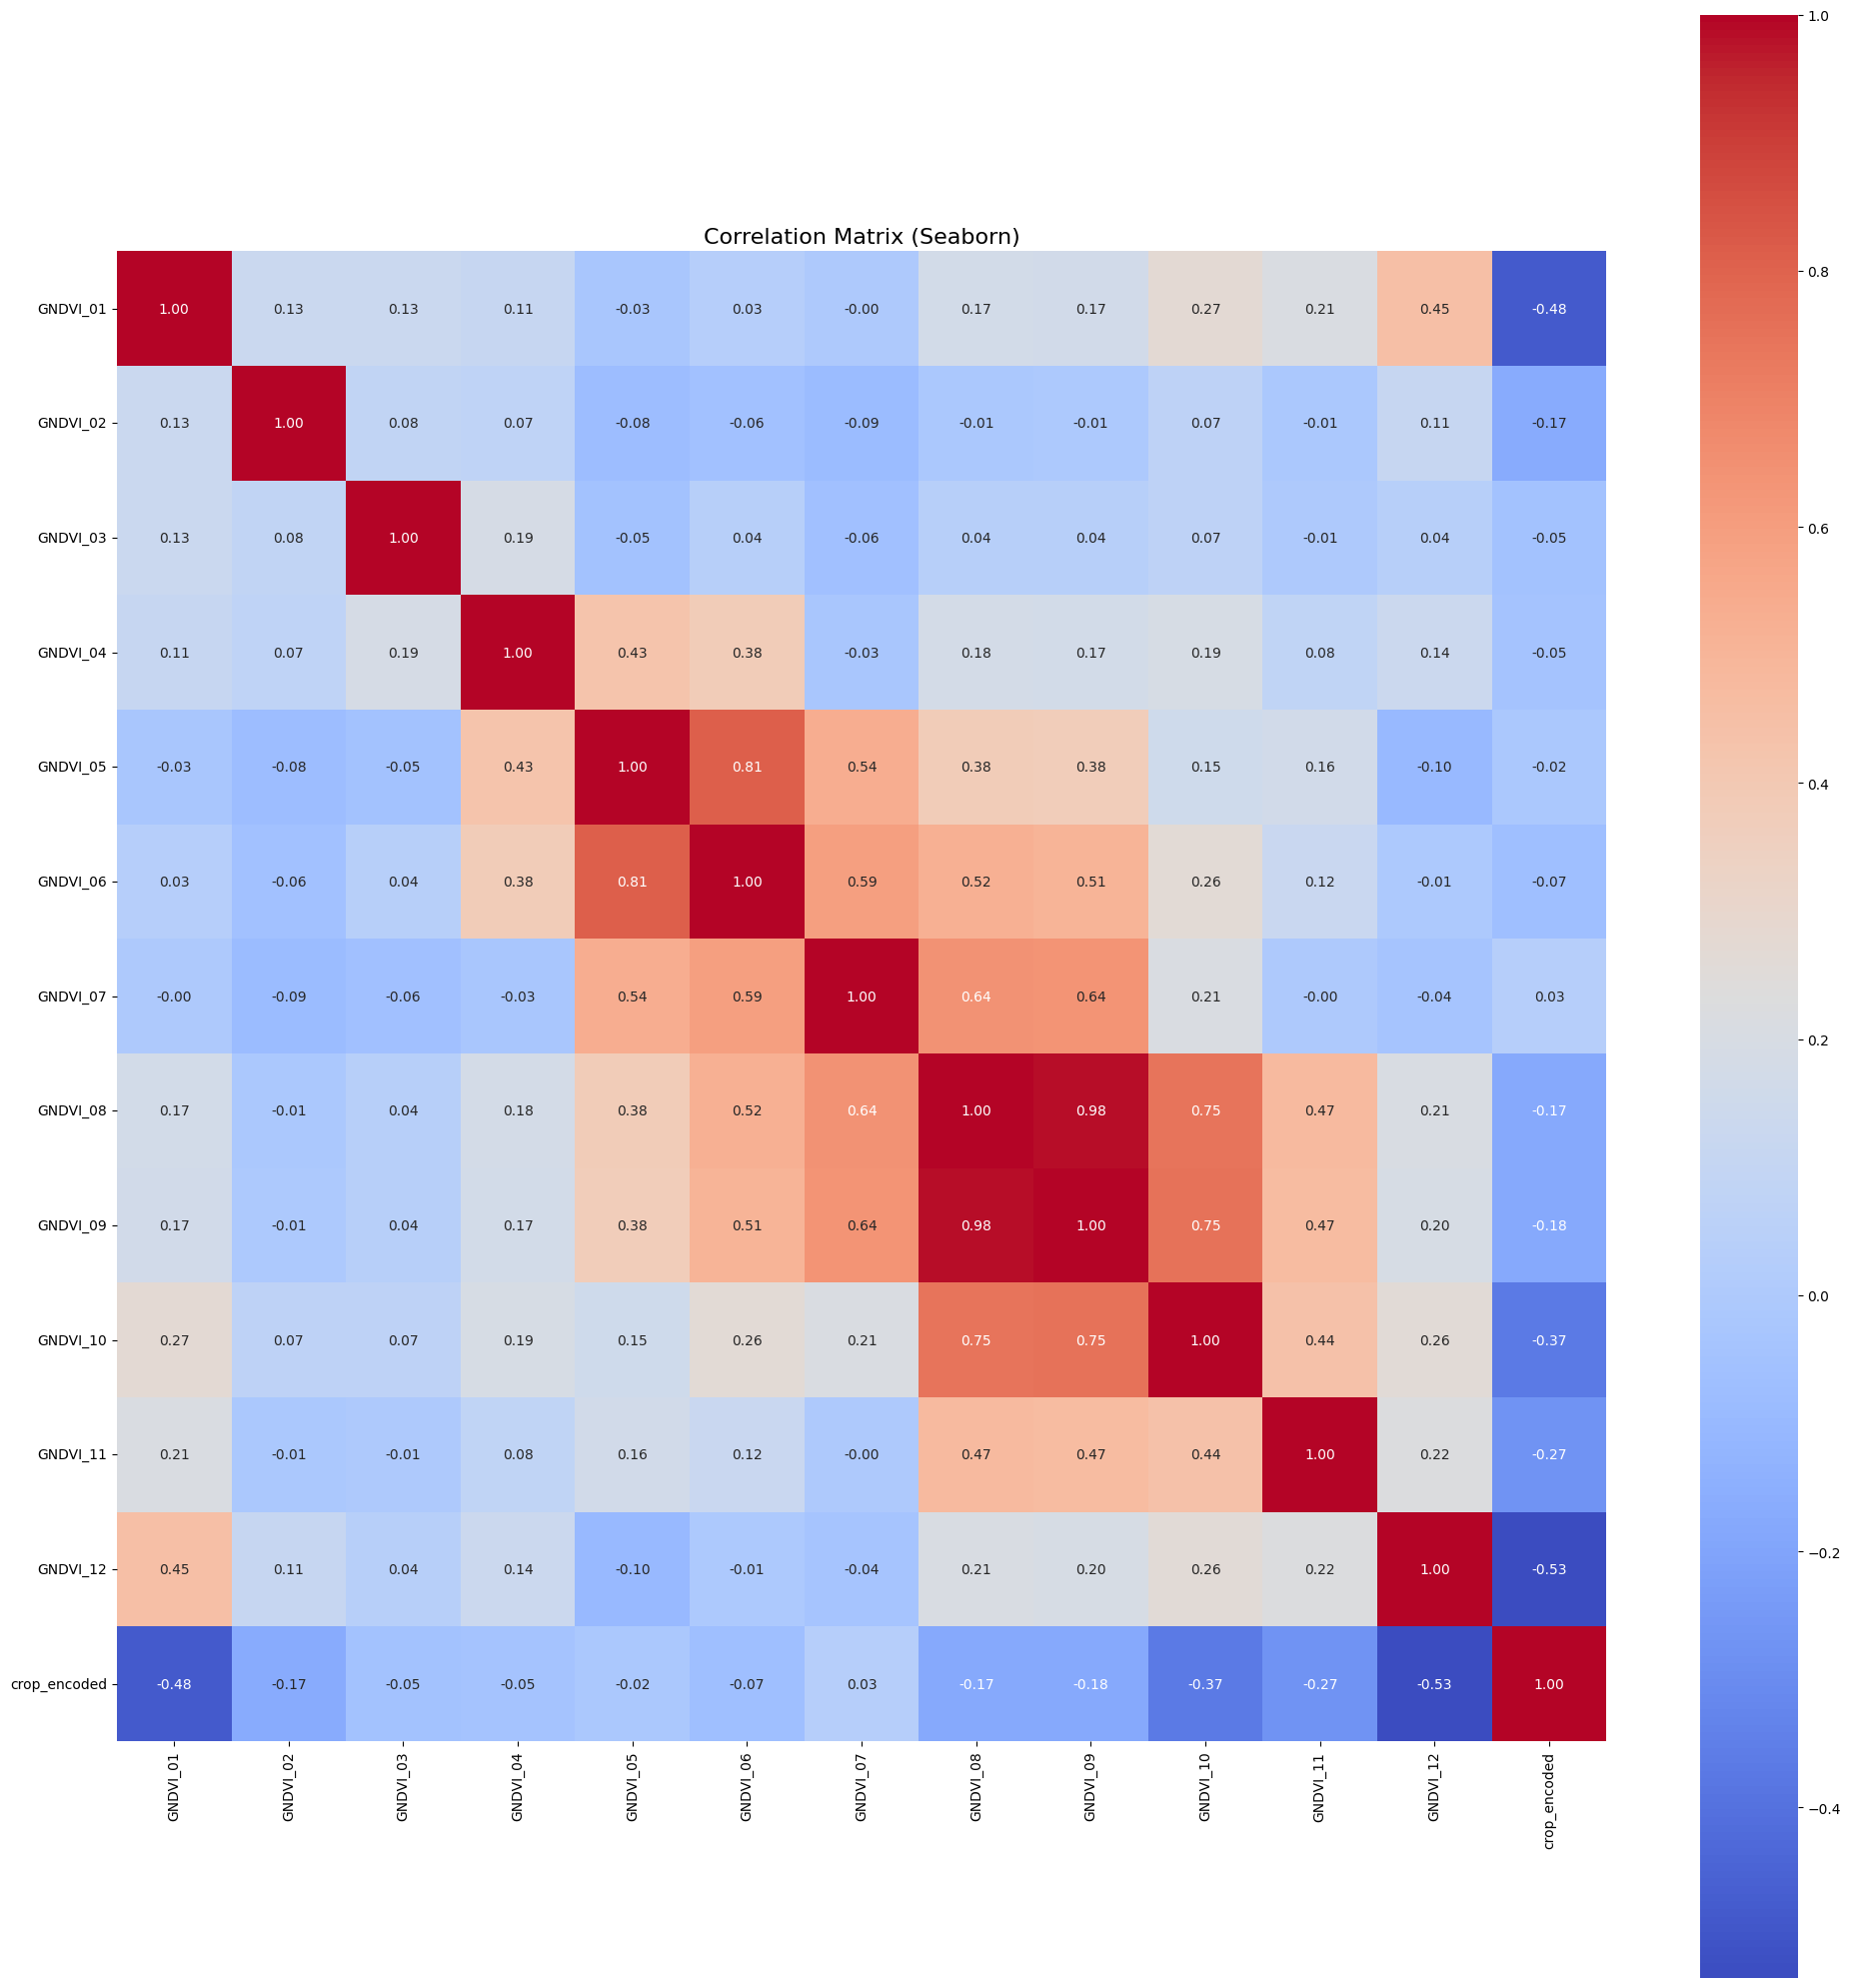

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(bands_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            xticklabels=bands_corr_matrix.columns, yticklabels=bands_corr_matrix.columns)

plt.title("Correlation Matrix (Seaborn)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### `Machine Learning`

In [18]:
crop_mapping = {'Cocoa': 0, 'Palm': 1, 'Rubber': 2}
train['crop_encoded'] = train['crop'].map(crop_mapping) 
evi2 = [col for col in train.columns if col.startswith('EVI2')]
train = train.drop(evi2, axis=1)

In [19]:
train.head()

,id,crop,B11_01,B11_02,B11_03,B11_04,B11_05,B11_06,B11_07,B11_08,...,MSAVI_std,MSAVI_range,MSAVI_amplitude,NDRE_max,NDRE_min,NDRE_mean,NDRE_std,NDRE_range,NDRE_amplitude,crop_encoded
0,059i1w,Palm,0.280123,0.302844,0.440020,0.269510,0.333271,0.333271,0.397082,0.302118,...,0.037546,0.147302,0.337506,0.286230,0.177653,0.254141,0.035960,0.108577,0.234060,1
1,0612VR,Palm,0.284604,0.246899,0.301514,0.316238,0.266391,0.266391,0.216595,0.247925,...,0.049040,0.188834,0.488704,0.316241,0.136936,0.274507,0.047046,0.179305,0.395662,1
2,09THeK,Rubber,0.283545,0.336928,0.307843,0.327156,0.459305,0.591506,0.586148,0.454630,...,0.106076,0.367580,1.014083,0.368007,0.012133,0.164881,0.111590,0.355874,0.936166,2
3,0B09t7,Palm,0.263392,0.245622,0.348023,0.289354,0.271499,0.501098,0.534371,0.533203,...,0.118398,0.349237,1.050339,0.382090,0.015611,0.208832,0.131241,0.366478,0.921493,1
4,0DNGt7,Cocoa,0.293665,0.398346,0.286084,0.352709,0.444651,0.444651,0.536643,0.443005,...,0.069543,0.280803,0.627760,0.345830,0.079212,0.202529,0.069128,0.266617,0.627272,0


In [20]:
X = train.drop(columns=['crop','id', 'crop_encoded']) 
y = train['crop_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [21]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for CatBoost 
classes = np.unique(train['crop_encoded'])
# class_weights = compute_class_weight(class_weight={0: 9, 1: 5, 2: 4}, classes=classes, y=train['crop_encoded'])
class_weights = compute_class_weight(class_weight={0: 10, 1: 8, 2: 5}, classes=classes, y=train['crop_encoded'])
# class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=train['crop_encoded'])
class_weights = class_weights.tolist()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import numpy as np
from itertools import product

def threshold_predict(probabilities, thresholds):
    preds = []
    for probs in probabilities:
        pred = np.argmax(probs)
        for i, th in enumerate(thresholds):
            if probs[i] >= th:
                pred = i
                break
        preds.append(pred)
    return np.array(preds)

def train_ensemble_with_cv(train, test, func_fea):
    skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

    val_preds = np.zeros(train.shape[0])
    y_all = train['crop_encoded'].values
    n_classes = len(np.unique(y_all))
    test_preds_proba = np.zeros((test.shape[0], n_classes))

    best_thresholds_per_fold = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(train, y_all)):
        print(f"\n🔁 Fold {fold}")

        X_train = train.loc[train_idx, func_fea]
        X_val = train.loc[val_idx, func_fea]
        X_test = test[func_fea]
        y_train = y_all[train_idx]
        y_val = y_all[val_idx]

        model = VotingClassifier(estimators=[
            ('lgbm', LGBMClassifier(n_estimators=800, learning_rate=0.03,
                                    class_weight={0: 10, 1: 8, 2: 8}, random_state=42)),
            ('xgb', XGBClassifier(tree_method='hist', use_label_encoder=False,
                                  eval_metric='mlogloss', learning_rate=0.03,
                                  n_estimators=800, random_state=42)),
            ('cat', CatBoostClassifier(iterations=800, learning_rate=0.03, depth=6,
                                       verbose=0, random_seed=42,
                                       class_weights={0: 10, 1: 8, 2: 8})),
            ('logreg', LogisticRegression(class_weight={0: 10, 1: 8, 2: 8},
                                          max_iter=1000, solver='liblinear')),
        ], voting='soft', n_jobs=-1)

        model.fit(X_train, y_train)

        val_prob = model.predict_proba(X_val)
        test_prob = model.predict_proba(X_test)
        test_preds_proba += test_prob

        # 🔍 Threshold tuning 
        best_thresholds = None
        best_score = -1
        search_space = [np.arange(0.3, 0.7, 0.05)] * n_classes

        for thresholds in product(*search_space):
            preds = threshold_predict(val_prob, thresholds)
            score = f1_score(y_val, preds, average='macro')
            if score > best_score:
                best_score = score
                best_thresholds = thresholds

        print(f"✅ Fold {fold} - Best thresholds: {best_thresholds}, Macro F1: {best_score:.4f}")
        best_thresholds_per_fold.append(best_thresholds)

        val_pred = threshold_predict(val_prob, best_thresholds)
        val_preds[val_idx] = val_pred

    test_preds_proba /= skf.n_splits

    # Final test prediction using average thresholds across folds
    avg_thresholds = np.mean(best_thresholds_per_fold, axis=0)
    test_preds = threshold_predict(test_preds_proba, avg_thresholds)

    print("\n📊 Final CV Results:")
    print(f"Accuracy: {accuracy_score(y_all, val_preds):.4f}")
    print(f"F1 Score (macro): {f1_score(y_all, val_preds, average='macro'):.4f}")
    print(classification_report(y_all, val_preds))

    return test_preds, val_preds, best_thresholds_per_fold


In [47]:
test.columns

Index(['B11_01', 'B11_02', 'B11_03', 'B11_04', 'B11_05', 'B11_06', 'B11_07',
       'B11_08', 'B11_09', 'B11_10',
       ...
       'MSAVI_mean', 'MSAVI_std', 'MSAVI_range', 'MSAVI_amplitude', 'NDRE_max',
       'NDRE_min', 'NDRE_mean', 'NDRE_std', 'NDRE_range', 'NDRE_amplitude'],
      dtype='object', length=354)

In [24]:
test.drop(columns='id', inplace=True)
test.drop(columns='crop', inplace=True) 
evi2_test = [col for col in test.columns if col.startswith('EVI2')]
test = test.drop(evi2_test, axis=1)

In [48]:
func_fea = X.columns.tolist()  # All features used for training
test_preds, val_preds, thresholds = train_ensemble_with_cv(train, test, func_fea=func_fea) 


🔁 Fold 0
✅ Fold 0 - Best thresholds: (0.3, 0.3, 0.3), Macro F1: 0.9531

🔁 Fold 1
✅ Fold 1 - Best thresholds: (0.3, 0.44999999999999996, 0.3), Macro F1: 0.9659

🔁 Fold 2
✅ Fold 2 - Best thresholds: (0.44999999999999996, 0.3, 0.3), Macro F1: 0.9445

🔁 Fold 3
✅ Fold 3 - Best thresholds: (0.3, 0.3, 0.3), Macro F1: 0.9249

🔁 Fold 4
✅ Fold 4 - Best thresholds: (0.3, 0.49999999999999994, 0.3), Macro F1: 0.9148

🔁 Fold 5
✅ Fold 5 - Best thresholds: (0.3, 0.3, 0.3), Macro F1: 0.9273

🔁 Fold 6
✅ Fold 6 - Best thresholds: (0.3, 0.49999999999999994, 0.3), Macro F1: 0.9519

📊 Final CV Results:
Accuracy: 0.9360
F1 Score (macro): 0.9404
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       235
           1       0.89      0.95      0.92       313
           2       0.94      0.91      0.93       405

    accuracy                           0.94       953
   macro avg       0.94      0.94      0.94       953
weighted avg       0.94      0.94      0.94

In [49]:
inverse_crop_mapping = {v: k for k, v in crop_mapping.items()}
predicted_crops = [inverse_crop_mapping[pred] for pred in test_preds]
submission_df = pd.DataFrame({'ID': identifier, 'Target': predicted_crops})
submission_df['ID'] = ['ID_' + str(i).zfill(6) for i in identifier]  

In [50]:
submission_file = 'crop_predictionsRasterio3.csv'
submission_df.to_csv(submission_file, index=False) 

In [51]:
df = pd.read_csv('crop_predictionsRasterio3.csv')
df['Target'].value_counts()

Target
Rubber    115
Palm      112
Cocoa      55
Name: count, dtype: int64

In [45]:
df = pd.read_csv('crop_predictionsCrossValidated13.csv')
df['Target'].value_counts()

Target
Rubber    122
Palm      107
Cocoa      53
Name: count, dtype: int64

In [30]:
# print(cm) 

In [31]:
# test.drop(columns='id', inplace=True)
# test.drop(columns='crop', inplace=True)
# test_predictions = model.predict(test)

In [32]:
# #For catboost
# if isinstance(test_predictions[0], (np.ndarray, list)):
#     test_predictions = np.argmax(test_predictions, axis=1)  # or use .ravel() if it's (n, 1)

# # Now apply the inverse mapping
# # inverse_crop_mapping = {0: 'Cocoa', 1: 'Palm', 2: 'Rubber'}
# predicted_crops = [inverse_crop_mapping[pred] for pred in test_predictions]


In [33]:
# predicted_crops = [inverse_crop_mapping[pred] for pred in test_predictions]


In [34]:
# class_to_crop = dict(zip(train_df['class'].unique(), train_df['crop'].unique()))
# test.rename(columns={'elevation_vals': 'elevation_3nn'}, inplace=True)

In [35]:
# predicted_crops = [class_to_crop.get(pred, 'Unknown') for pred in test_predictions]

#For catboost classifier
# predicted_crops = [class_to_crop.get(pred[0], 'Unknown') for pred in test_predictions]


In [36]:

# submission_df = pd.DataFrame({'ID': identifier, 'Target': predicted_crops})
# submission_df['ID'] = ['ID_' + str(i).zfill(6) for i in identifier]


In [37]:
# submission_file = 'crop_predictions6.csv'
# submission_df.to_csv(submission_file, index=False)

In [ ]:
# predicions_valcounts['ID'].nunique()

In [ ]:
# predict_df = pd.DataFrame(
#     columns={
#     "ID": identifier,
#     "values": test['class'], 
#     }
# )

In [ ]:
# predict_df.to_csv('pred1.csv', index=False)